## Problem Solved in this Project and How it is Solved:
Human express thier emotions/ sentiments on social media about almost everything on platforms like twitter, facebook, yelp, reddit.
The problem is the abundance of data present which can not be handled by humans alone. 

This is when the term big data got its foundation. To handle the big data we need Machine learning. 
the problem is computers only understand numbers not text or sentiments.

Thanks to machine learning liabraries of Python it is now possible to convert text to a form which can be understood by the computer.

In simple words we clean the text, process it by removing stopwords, punctuation, special characters and then train our ML model to perform sentiment analysis. 

It is similar to how we train a student by teaching the content of the class then testing it to check how accurate it got trained. The more content is taught to the student the better score it acquires.
similarly the more data we feed to our maching learning model the better it gets at prediction.



# **Project Name: Sentiment Analysis on Movie Reviews**



### **What is sentiment analysis?**
	
Sentiment analysis is a method in machine learning that uses natural language processing in order to analyze text or speech and interpret subjective information into qualitative data. Oftentimes, it is used to interpret opinionated text, and sort them into positive, negative, or neutral categories.

### Why it is important?
Sentiment analysis is extremely useful in the age of big data where we have enormous amounts of data at hand. People express their sentiments on social media. The ability to monitor, obtain an overview of the wider public opinion and the extracting meaningful insight from it can be beneficial in every organization. Be it Politics, marketing or entertainment industries.
For example: In entertainment industry doing sentiment analysis on publics reviews on a movie can help the film makers find out which movies get positive feedback which can help them in coming up with better and profitable content in the future. 

## **Naive Bayes Algorithm**

The Naive Bayes Algorithm is a classification algorithm that is used to predict class based on certain attributes. In this case with sentiment analysis, it predicts the opinion of text based on certain keywords and phrases in order to classify them as positive, negative, or neutral. It is one of the fastest and most efficient algorithms used to process and interpret large amounts of data.

**There are three types of Naive Bayes model under the scikit-learn library:**

Gaussian:used in classification and it assumes that features follow a normal distribution.

Multinomial: It is used for discrete counts. For example, let’s say,  we have a text classification problem. Here we can consider Bernoulli trials which is one step further and instead of “word occurring in the document”, we have “count how often word occurs in the document”, you can think of it as “number of times outcome number x_i is observed over the n trials”.

Bernoulli: The binomial model is useful if your feature vectors are binary (i.e. zeros and ones). One application would be text classification with ‘bag of words’ model where the 1s & 0s are “word occurs in the document” and “word does not occur in the document” respectively.

https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/#:~:text=Naive%20Bayes%20Model-,What%20is%20Naive%20Bayes%20algorithm%3F,presence%20of%20any%20other%20feature.

## **Libraries used**

Pandas,
Numpy,
Matplotlib,
Sklearn,
NLTK

## **Project Introduction**

For our project, we decided to use sentiment analysis to create a program in which we will build a model and then train it with 75% of the dataset and then will test it using the remaining data set. We will check the accuracy of our model to predict sentiments.


## **Data set being used**

IMDB Dataset of 50K Movie Reviews 
https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?select=IMDB+Dataset.csv

## **Steps:**

Text preprocessing
Removing null values
Remove html tags
Removing stop words
Converting to lower case
Removing special characters
stemming
Text vectorizing using countvectorizer
Split the data for training and testing
Feed the data 
Train and test
Deployment

## **Code Walkthrough**



## **Getting Started**

### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import re
import nltk
import os
import random
import string

### Reading File from the drive using Pandas Library

In [2]:
#path = 'C:\Users\shpar\IMDB Dataset.csv'
data = pd.read_csv(r"C:\Users\shpar\IMDB Dataset.csv")

### **Data Exploration**

In [3]:
data.shape

(50000, 2)

In [4]:
data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [5]:
data.columns

Index(['review', 'sentiment'], dtype='object')

In [6]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [7]:
review = data['review']
review

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [8]:

sentiment = data['sentiment']
sentiment

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
49995    positive
49996    negative
49997    negative
49998    negative
49999    negative
Name: sentiment, Length: 50000, dtype: object

In [9]:
sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

Code source :kaggle.com/code/avnika22/imdb-perform-sentiment-analysis-with-scikit-learn

## **Data Cleaning and PreProcessing**

## **Step 1:Looking for Null values and dropping them if there are any**

In [10]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [11]:
#there are no null values

## **Step 2:Looking for Duplicate values and dropping them**

In [12]:
data.duplicated().sum()

418

In [13]:
#418 duplicated values found so lets drop them

In [14]:
data.drop_duplicates(inplace=True)

In [15]:
data.shape

(49582, 2)

## **Step 3: Replacing the Sentiment coloumn values from string to numeric**

In [16]:
data['sentiment'].replace({'positive':1, 'negative':0}, inplace=True)

In [17]:
data.sentiment.head()

0    1
1    1
2    1
3    0
4    1
Name: sentiment, dtype: int64

#**Step 4: Removing HTML Tags, Converting to lowercase and removing Stopwords**


In [18]:
#Importing Natural Language Toolkit
import nltk
from nltk.corpus import stopwords

In [19]:
english_stopwords = set(stopwords.words('english'))
english_stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

### Function to remove HTML Tags, Converting to lowercase, removing punctuation marks and Stopwords

In [20]:
CLEANR = re.compile('<.*?>')

#funtion to remove html tags
def remove_tags(raw_html):
  cleantext = re.sub(CLEANR, '', raw_html)
  return cleantext

#funtion to remove puntuation tags
def remove_punc(txt):
    punc_text = txt.translate(str.maketrans('', '', string.punctuation))
    return punc_text

def remove_tags_lower_punct_stopwords(text):
    text_without_Tags = remove_tags(text)
    lower = text_without_Tags.lower() #converting to lower case
    punct = remove_punc(lower)
    cleaned_corpus = []
    for word in punct.split():
        if word not in english_stopwords:
            cleaned_corpus.append(word)
    
    
    temp = cleaned_corpus [:]
    cleaned_corpus.clear()
    return temp

In [21]:
 data['review']= data['review'].apply(remove_tags_lower_punct_stopwords)

In [22]:
data['review'][0]

['one',
 'reviewers',
 'mentioned',
 'watching',
 '1',
 'oz',
 'episode',
 'youll',
 'hooked',
 'right',
 'exactly',
 'happened',
 'methe',
 'first',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pulls',
 'punches',
 'regards',
 'drugs',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'wordit',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focuses',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'manyaryans',
 'muslims',
 'gangstas',
 'latinos',
 'christians',
 'italians',
 'irish',
 'moreso',
 'scuffles',
 'death',
 'stares',
 'dodgy',
 'dealings',
 'shady',
 'agreements',
 'never',
 'far',
 'awayi',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'f

### **Step 5: Removing special Character**

In [23]:
data.replace('\*','',regex=True)

,review,sentiment
0,"[one, reviewers, mentioned, watching, 1, oz, e...",1
1,"[wonderful, little, production, filming, techn...",1
2,"[thought, wonderful, way, spend, time, hot, su...",1
3,"[basically, theres, family, little, boy, jake,...",0
4,"[petter, matteis, love, time, money, visually,...",1
...,...,...
49995,"[thought, movie, right, good, job, wasnt, crea...",1
49996,"[bad, plot, bad, dialogue, bad, acting, idioti...",0
49997,"[catholic, taught, parochial, elementary, scho...",0
49998,"[im, going, disagree, previous, comment, side,...",0


Code source : https://stackoverflow.com/questions/63904201/cleaning-a-dataset-and-removing-special-characters-in-python

## **Step 6: Word Lemmatization**

**Lemmatization:**
It stems the word but makes sure that it does not lose its meaning.  Lemmatization has a pre-defined dictionary that stores the context of words and checks the word in the dictionary while diminishing.

In [24]:
from nltk.stem import WordNetLemmatizer

#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

#defining the function for lemmatization
def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  return lemm_text



Code source :https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/

In [25]:
nltk.download('wordnet')
data['msg_lemmatized'] = data['review'].apply(lambda x:lemmatizer(x))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shpar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
data["review"][0]

['one',
 'reviewers',
 'mentioned',
 'watching',
 '1',
 'oz',
 'episode',
 'youll',
 'hooked',
 'right',
 'exactly',
 'happened',
 'methe',
 'first',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pulls',
 'punches',
 'regards',
 'drugs',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'wordit',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focuses',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'manyaryans',
 'muslims',
 'gangstas',
 'latinos',
 'christians',
 'italians',
 'irish',
 'moreso',
 'scuffles',
 'death',
 'stares',
 'dodgy',
 'dealings',
 'shady',
 'agreements',
 'never',
 'far',
 'awayi',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'f

Since during the preprocessing the reviews have been converted to a list now we need to convert it back to one single string

In [27]:
def assembled_string(Review_list):
    return " ".join(Review_list)
    
data['review'] = data['review'].apply(assembled_string)


**Pre-Processing ends here!**

In [28]:
#Now we will print the review to to see the cleaned string
data['review']

0        one reviewers mentioned watching 1 oz episode ...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        basically theres family little boy jake thinks...
4        petter matteis love time money visually stunni...
                               ...                        
49995    thought movie right good job wasnt creative or...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    im going disagree previous comment side maltin...
49999    one expects star trek movies high art fans exp...
Name: review, Length: 49582, dtype: object

# **Data Visualization**

## **Representing Positive and negative reviews in Word Cloud**

In [32]:
conda install -c conda-forge wordcloud=1.6.0 

Solving environment: ...working... done

# All requested packages already installed.

Note: you may need to restart the kernel to use updated packages.



In [33]:
from wordcloud import WordCloud, STOPWORDS

In [34]:


#from nltk.corpus import STOPWORDS
stop = stopwords.words('english')
#from wordcloud import WordCloud,STOPWORDS

from wordcloud import WordCloud
positive_review = data[ data['sentiment'] == 1]
positive_review =positive_review['review']
negative_review = data[data['sentiment'] == 0]
negative_review= negative_review['review']

def wordcloud_draw(data, color = 'white'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                              if(word!='movie' and word!='film')
                            ])
    wordcloud = WordCloud(stopwords=stop,
                          background_color = color,
                          width=2500, 
                          height=2000).generate(cleaned_word)
  
  
    plt.figure(1,figsize=(10, 10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    


Positive Reviews Word Cloud


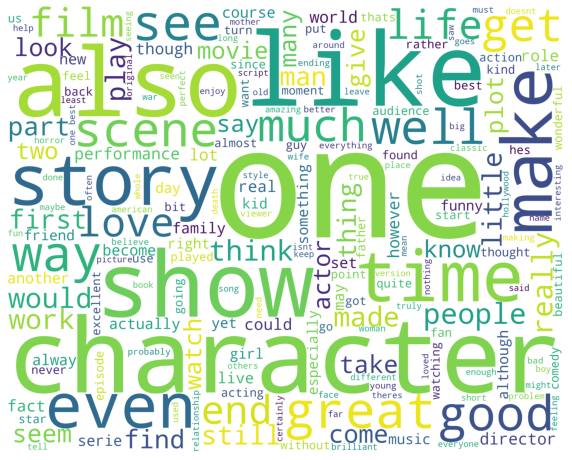

Negative Reviews Word Cloud


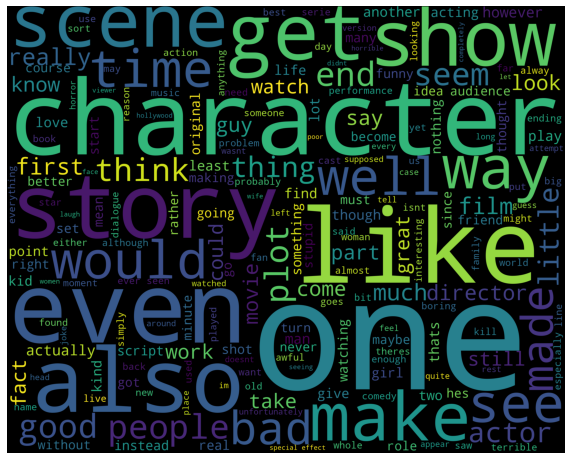

In [35]:
print("Positive Reviews Word Cloud")
wordcloud_draw(positive_review, color='white')

print("Negative Reviews Word Cloud")
wordcloud_draw(negative_review ,color='black')

No handles with labels found to put in legend.


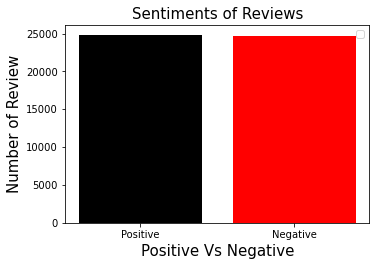

In [36]:
def draw_bar_plot(category,length,xlabel,ylabel,title,sub):
    plt.subplot(2,2,sub)
    plt.bar(category, length,color = ['black', 'red', 'green', 'blue', 'cyan'])
    plt.legend()
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.title(title, fontsize=15)
    

plt.figure(figsize = (12,8))
draw_bar_plot(["Positive","Negative"],[len(data[data.sentiment ==1]), len(data[data.sentiment==0])],"Positive Vs Negative","Number of Review","Sentiments of Reviews",1)

# **Machine Learning Code begins:**

**Step 6: Text Vectorizing Using Count vectorizer**
CountVectorizer is a great tool provided by the scikit-learn library in Python. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. This is helpful when we have multiple such texts, and we wish to convert each word in each text into vectors (for using in further text analysis).

source:https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/

In [48]:
X = data.iloc[:,0].values

In [49]:
y = data.iloc[:,1].values

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1000)
X = cv.fit_transform(data['review']).toarray()


### Splitting the data for training and testing using train_test_split from Sklearn

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 45)

In [52]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

#Creating an instance of multinomial naive bayes classifier
nb_classifier = MultinomialNB()


In [53]:
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

accuracy_score(y_pred,y_test)

0.8266376250403356

## **References**

## **Challenges Faced:**
learning curve
ran into errors like attribute errors, value error and out or memory error

## **What could have been done differently:**
If we had more time we would use unstructured raw data and then label the sentiments using ML algorithms and then perform sentiment analysis.

## **Each members Contribution:**

Sumaira:  researching, learning, coding, collaboration, Presentation

Oliver: coding

Mia: documentation